<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/mamatha/blob/main/text_mining_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Text Mining assignment

 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
import pandas
df=pd.read_csv("Elon_musk.csv",error_bad_lines=False,encoding='latin-1')

<ipython-input-2-47574b0c680a>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("Elon_musk.csv",error_bad_lines=False,encoding='latin-1')


In [ ]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
import itertools

c = list(itertools.chain(*df.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

In [ ]:
import re
import string
# Removing unwanted symbols incase if exists


def clean_Text(Text):
  Text = Text.lower()
  Text = re.sub("[^A-Za-z]+"," ",Text)
  Text = re.sub("[0-9]+"," ",Text)
  Text = re.sub('\[.*?\]','',Text)
  Text = re.sub('[%s]' % re.escape(string.punctuation), '', Text)
  Text = re.sub('\w*\d\w*', '', Text)
  return Text


clean = lambda x: clean_Text(x)

df["Text"] = df["Text"].apply(clean_Text)


In [ ]:
df

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazi...
...,...
1994,flcnhvy true it sounds so surreal but the neg...
1995,ppathole make sure to read ur terms amp condi...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f u f


In [ ]:
#frequency of words
freq1 = pd.Series(' '.join(df['Text']).split()).value_counts()[:50] # for top 20
freq1

t                 754
co                660
https             655
the               487
a                 405
to                400
is                356
u                 334
of                316
f                 262
spacex            250
in                221
amp               219
it                194
for               194
s                 193
tesla             179
we                173
will              165
be                157
that              149
i                 147
erdayastronaut    142
this              140
on                130
rt                127
but               126
ppathole          123
flcnhvy           114
with              108
you               106
are               100
at                 95
yes                86
and                85
not                77
great              76
have               74
was                74
as                 73
teslaownerssv      73
from               72
wholemarsblog      68
so                 68
just               64
no        

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
freq_stp = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_stp

co                 660
https              655
u                  334
f                  262
spacex             250
amp                219
tesla              179
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
space               54
good                51
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [ ]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df["Text"])
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
vocab = vectorizer.vocabulary_
vocab

{'kunalb': 2503,
 'alien': 137,
 'id': 2144,
 'aa': 0,
 'carmack': 647,
 'ray': 3736,
 'tracing': 4783,
 'cyberpunk': 1011,
 'hdr': 1986,
 'next': 3072,
 'level': 2593,
 'tried': 4805,
 'joerogan': 2385,
 'spotify': 4332,
 'great': 1896,
 'interview': 2282,
 'gtera': 1915,
 'doge': 1201,
 'underestimated': 4911,
 'teslacn': 4606,
 'congratulations': 884,
 'tesla': 4602,
 'china': 744,
 'amazing': 164,
 'execution': 1481,
 'last': 2538,
 'year': 5351,
 'even': 1450,
 'happy': 1960,
 'new': 3069,
 'ox': 3292,
 'https': 2103,
 'co': 803,
 'wfkmyu': 5169,
 'oj': 3198,
 'frodo': 1721,
 'underdoge': 4910,
 'thought': 4692,
 'would': 5257,
 'fail': 1525,
 'zgxjfdzzrm': 5412,
 'owensparks': 3288,
 'flcnhvy': 1644,
 'anonyx': 195,
 'haha': 1939,
 'thanks': 4650,
 'indeed': 2212,
 'tweets': 4852,
 'definitely': 1079,
 'represent': 3833,
 'real': 3758,
 'world': 5251,
 'time': 4710,
 'allocation': 141,
 'entertaining': 1392,
 'outcome': 3264,
 'likely': 2619,
 'givedirectly': 1843,
 'sent': 4089,

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(df['Text'])
pd.DataFrame(tfidf.toarray())


,0,1,2,3,4,5,6,7,8,9,...,5436,5437,5438,5439,5440,5441,5442,5443,5444,5445
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.252099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer.vocabulary_

{'kunalb': 2503,
 'alien': 137,
 'id': 2144,
 'aa': 0,
 'carmack': 647,
 'ray': 3736,
 'tracing': 4783,
 'cyberpunk': 1011,
 'hdr': 1986,
 'next': 3072,
 'level': 2593,
 'tried': 4805,
 'joerogan': 2385,
 'spotify': 4332,
 'great': 1896,
 'interview': 2282,
 'gtera': 1915,
 'doge': 1201,
 'underestimated': 4911,
 'teslacn': 4606,
 'congratulations': 884,
 'tesla': 4602,
 'china': 744,
 'amazing': 164,
 'execution': 1481,
 'last': 2538,
 'year': 5351,
 'even': 1450,
 'happy': 1960,
 'new': 3069,
 'ox': 3292,
 'https': 2103,
 'co': 803,
 'wfkmyu': 5169,
 'oj': 3198,
 'frodo': 1721,
 'underdoge': 4910,
 'thought': 4692,
 'would': 5257,
 'fail': 1525,
 'zgxjfdzzrm': 5412,
 'owensparks': 3288,
 'flcnhvy': 1644,
 'anonyx': 195,
 'haha': 1939,
 'thanks': 4650,
 'indeed': 2212,
 'tweets': 4852,
 'definitely': 1079,
 'represent': 3833,
 'real': 3758,
 'world': 5251,
 'time': 4710,
 'allocation': 141,
 'entertaining': 1392,
 'outcome': 3264,
 'likely': 2619,
 'givedirectly': 1843,
 'sent': 4089,

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Returns a string
dataset = open("Elon_musk.csv", "r",encoding='Latin-1').read()
dataset = dataset.lower()

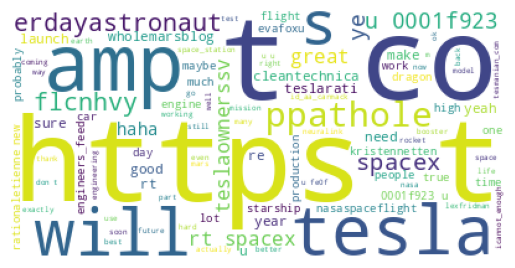

In [ ]:

cloud = WordCloud(background_color = "white", max_words = 200,  stopwords = set(STOPWORDS))
cloud.generate(dataset)
plt.axis("off")
plt.imshow(cloud)
plt.show()

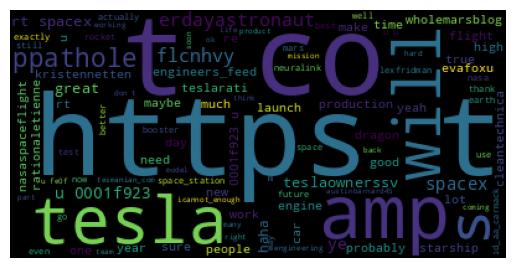

In [ ]:
cloud = WordCloud(background_color = "black", max_words = 100,  stopwords = set(STOPWORDS))
cloud.generate(dataset)
cloud.to_file("wordCloud.png")
plt.axis("off")
plt.imshow(cloud)
plt.show()

In [ ]:
affinity_scores = df['Text'].to_dict()

In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.

sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:

# test that it works
calculate_sentiment(text = 'tesla')

0

In [ ]:
df['sentiment_value'] = df['Text'].apply(calculate_sentiment)

In [ ]:
df['word_count'] = df['Text'].str.split().apply(len)
df['word_count'].head(10)

0     2
1    10
2     4
3     3
4    10
5     8
6     8
7     5
8    10
9     3
Name: word_count, dtype: int64

In [ ]:
df.sort_values(by='sentiment_value').tail(10)

,Text,sentiment_value,word_count
664,lugg pcgamer avionics cables moving steel pipe...,0,16
663,icannot enough erdayastronaut rweb pretty clos...,0,20
662,flcnhvy lugg pcgamer maybe making notable chan...,0,13
661,josh bickett icannot enough erdayastronaut rwe...,0,16
660,parstalberg josh bickett icannot enough erdaya...,0,13
659,erdayastronaut rweb merlin strong local maximu...,0,14
658,speculawyer erdayastronaut rweb exactly,0,4
657,ppathole erdayastronaut rweb yeah looks like m...,0,14
670,billhuang johnnacrider timmerenginerd jack may...,0,8
1998,progress update august,0,3


In [ ]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head(11)


,Text,sentiment_value,word_count,subjectivity,polarity
0,kunalb alien,0,2,0.750000,-0.250000
1,id aa carmack ray tracing cyberpunk hdr next l...,0,10,0.000000,0.000000
2,joerogan spotify great interview,0,4,0.750000,0.800000
3,gtera doge underestimated,0,3,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0,10,0.322222,0.200000
5,happy new year ox https co wfkmyu oj,0,8,0.727273,0.468182
6,frodo underdoge thought would fail https co zg...,0,8,0.300000,-0.500000
7,owensparks flcnhvy anonyx haha thanks,0,5,0.250000,0.200000
8,flcnhvy anonyx indeed tweets definitely repres...,0,10,0.400000,0.100000
9,entertaining outcome likely,0,3,0.850000,0.250000


In [ ]:
df['index']=range(0,len(df))

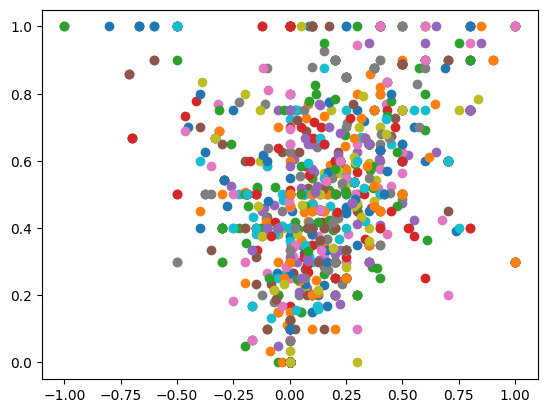

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
for i in range(0, df.shape[0]):
  plt.scatter(df["polarity"][i], df["subjectivity"][i], data = df)

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('Text')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
def get_vader_sentiment(review):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text
    analysis = sia.polarity_scores(review)
    # set sentiment
    if analysis["compound"] > 0:
        return 'positive sentiment'
    elif analysis["compound"] < 0:
        return 'negative sentiment'
    else:
        return 'neutral'

In [ ]:
get_vader_sentiment('Text')

'neutral'